<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/022__Line_Charts_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 2/6: EXPLORATORY DATA VISUALIZATION

# MISSION 1: Line Charts

*Learn the basics of data visualization.*

In this mission, we will look at a sample of a dataset on unemployment as a table and noted some observations. We will introduce line charts and witness how a visual representation of the same data sample allows us to surface the same observations quickly. Finally, we will explore the basics of the pyplot module and learn how to create and customize a line chart that visualized the sample.

## 1. Representation Of Data


Data that are represented as tables (CSV, Excel, pandas) makes it difficult to explore a dataset to uncover patterns. Data visualization is a discipline that focuses on the visual representation of data to transform data from table representations visual ones, and enable us to find patterns quicker.

In this course, named Exploratory Data Visualization, we will learn data visualization techniques to explore datasets and help us uncover patterns. In this mission, we'll use a specific type of data visualization to understand U.S. unemployment data.

## 2. Introduction To The Data

![BLS logo](https://www.nccaom.org/wp-content/uploads/2016/12/BLS-Timeline-Main.jpg)

The United States [Bureau of Labor Statistics (BLS)](https://www.bls.gov/) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. To find more information about how the BLS calculates the unemployment rate click [here](http://www.bls.gov/cps/cps_htgm.htm).

The BLS releases monthly unemployment data available for download as an Excel file, with the `.xlsx` file extension. While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format. Let's instead download the same dataset as a CSV file [here](https://drive.google.com/file/d/1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p/view?usp=sharing) or [here](https://github.com/Rossel/DataQuest_Courses/blob/master/datasets/unrate.csv). 

The dataset contains the monthly unemployment rate as a CSV from January 1948 to August 2016 and is saved as `unrate.csv`. Before we get into visual representations of data, let's first read this CSV file into pandas to explore the table representation of this data. The dataset we'll be working with is a [time series](https://en.wikipedia.org/wiki/Time_series) dataset, which means the data points (monthly unemployment rates) are ordered by time.







Let's start by importing the libraries we need and reading the dataset into pandas using Google Colab.

In [14]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [15]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p/view?usp=sharing
id = "1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p"

In [16]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('unrate.csv')

In [17]:
# Import pandas library and read csv
import pandas as pd
unrate = pd.read_csv('unrate.csv')

When we read the dataset into a DataFrame, pandas will set the data type of the `DATE` column as a text column. Because of how pandas reads in strings internally, this column is given a data type of `object`. We need to convert this column to the `datetime` type using the `pandas.to_datetime()` [function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html), which returns a Series object with the `datetime` data type that we can assign back to the DataFrame:
```
df['col'] = pd.to_datetime(df['col'])
```



In [18]:
# Convert the DATE column into a series of datetime values
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

In [19]:
# Retrieve info on the unrate dataframe
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


We can see here that the `DATE` column is of the `datetime64` Dtype.

In [20]:
# Print the first 12 rows
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


In [21]:
# Print dataframe dimensions
print(unrate.shape)

(824, 2)


## 3. Table Representation

The dataset contains 2 columns:

- `DATE`: date, always the first of the month. Here are some examples:
  - `1948-01-01`: January 1, 1948.
  - `1948-02-01`: February 1, 1948.
  - `1948-03-01`: March 1, 1948.
  - `1948-12-01`: December 1, 1948.
- `VALUE`: the corresponding unemployment rate, in percent.

## 4. Observations From The Table Representation


We can make the following observations from the table:

- In 1948:
  - monthly unemployment rate ranged between `3.4` and `4.0`.
  - highest unemployment rate was reached in both March and December.
  - lowest unemployment rate was reached in January.
- From January to March, unemployment rate trended up.
- From March to May, unemployment rate trended down.
- From May to August, unemployment rate trended up.
- From August to October, unemployment rate trended down.
- From October to December, unemployment rate trended up.

Because the table only contained the data from 1948, it didn't take too much time to identify these observations. If we scale up the table to include all 824 rows, it would be very time-consuming and painful to understand. **Tables shine at presenting information precisely at the intersection of rows and columns** and **allow us to perform quick lookups when we know the row and column we're interested in**. In addition, problems that involve **comparing values between adjacent rows or columns** are well suited for tables. Unfortunately, many problems you'll encounter in data science require comparisons that aren't possible with just tables.

For example, one thing we learned from looking at the monthly unemployment rates for 1948 is that every few months, the unemployment rate switches between trending up and trending down. It's not switching direction every month, however, and this could mean that there's a seasonal effect. Seasonality is when a pattern is observed on a regular, predictable basis for a specific reason. A simple example of seasonality would be a large increase textbook purchases every August every year. Many schools start their terms in August and this spike in textbook sales is directly linked.

We need to first understand if there's any seasonality by comparing the unemployment trends across many years so we can decide if we should investigate it further. The faster we're able to assess our data, the faster we can perform high-level analysis quickly. If we're reliant on just the table to help us figure this out, then we won't be able to perform a high level test quickly. Let's see how a visual representation of the same information can be more helpful than the table representation.

## 5. Visual Representation

Instead of representing data using text like tables do, visual representations use visual objects like dots, shapes, and lines on a grid. Plots are a category of visual representations that allow us to easily understand the relationships between variables. There are many types of plots and selecting the right one is an important skill that you'll hone as you create data visualizations. Because we want to compare the unemployment trends across time, we should use line charts. Here's an overview of line charts using 4 sample data points:

![alt text](https://s3.amazonaws.com/dq-content/line_plot_basics.png)

Line charts work best when there is a logical connection between adjacent points. In our case, that connection is the flow of time. Between 2 reported monthly unemployment values, the unemployment rate is fluctuating and time is passing. To emphasize how the visual representation of the line chart helps us observe trends easily, let's look at the same 12 data points from 1948 as a line chart.

![alt text](https://s3.amazonaws.com/dq-content/unemp_line_plot.png)

We can reach the same observations about the data from the line chart as we did from the table representation:

![alt text](https://s3.amazonaws.com/dq-content/unemp_plot_observations.png)

In the rest of this mission, we'll explore how to recreate this line chart in Python. In the next mission, we'll explore how to create multiple line charts to help us compare unemployment trends.

## 6. Introduction to Matplotlib

To create the line chart, we'll use the [matplotlib](http://matplotlib.org/) library, which allows us to:

- quickly create common plots using high-level functions
- extensively tweak plots
- create new kinds of plots from the ground up

To help you become familiar with matplotlib, we'll focus on the first 2 use cases. When working with commonly used plots in matplotlib, the general workflow is:

- create a plot using data
- customize the appearance of the plot
- display the plot
- edit and repeat until satisfied

This interactive style aligns well with the exploratory workflow of data visualization because we're asking questions and creating data visualizations to help us get answers. The pyplot module provides a high-level interface for matplotlib that allows us to quickly create common data plots and perform common tweaks to them.

The pyplot module is commonly imported as `plt` from `matplotlib`:


```
import matplotlib.pyplot as plt
```

Using the different pyplot functions, we can create, customize, and display a plot. For example, we can use 2 functions to :



```
plt.plot()
plt.show()
```
Because we didn't pass in any arguments, the `plot()` function would generate an empty plot with just the axes and ticks and the `show()` function would display that plot. You'll notice that we didn't assign the plot to a variable and then call a method on the variable to display it. We instead called 2 functions on the pyplot module directly.

This is because every time we call a pyplot function, the module maintains and updates the plot internally (also known as state). When we call `show()`, the plot is displayed and the internal state is destroyed. While this workflow isn't ideal when we're writing functions that create plots on a repeated basis as part of a larger application, it's useful when exploring data.

Let's run this code to see the default properties matplotlib uses. If you'd like to follow along on your own computer, we recommend installing matplotlib using Anaconda: `conda install matplotlib`. We recommend working with matplotlib using Jupyter Notebook because it can render the plots in the notebook itself. To enable Jupyter and matplotlib working together effectively, you'll need to run the `%matplotlib inline` magic in a code cell each time you open the notebook (you can read more here). After running `%matplotlib inline`, the plots will be displayed in the output cell whenever you call `show()`.






In [22]:
# Import the matplotlib library
import matplotlib as mpl
import matplotlib.pyplot as plt

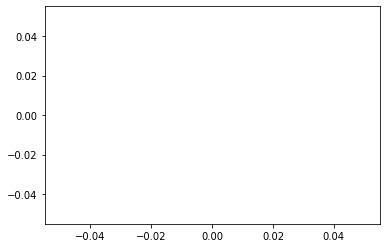

In [23]:
# Generate an empty plot with just the axes and ticks 
plt.plot()

# Display the plot
plt.show()

## 7. Adding Data

By default, Matplotlib displayed a coordinate grid with:

- the x-axis and y-axis values ranging from `-0.06` to `0.06`
- no grid lines
- no data

Even though no data was plotted, the x-axis and y-axis ticks correspond to the `-0.06` to `0.06` value range. The axis ticks consist of tick marks and tick labels. Here's a focused view of the x-axis tick marks and x-axis tick labels:

![alt text](https://s3.amazonaws.com/dq-content/axis+ticks.png)

To create a line chart of the unemployment data from 1948, we need:

- the x-axis to range from 01-01-1948 to 12-01-1948 (which corresponds to the first and last months in 1948)
- the y-axis to range from 3.4 to 4.0 (which correspond to the minimum and maximum unemployment values)

Instead of manually updating the ticks, drawing each marker, and connecting the markers with lines, we can just specify the data we want plotted and let matplotlib handle the rest. To generate the line chart we're interested in, we pass in the list of x-values as the first parameter and the list of y-values as the second parameter to plot():

```
plt.plot(x_values, y_values)
```
Matplotlib will accept any iterable object, like NumPy arrays and pandas.Series instances.



Instructions:

- Generate a line chart that visualizes the unemployment rates from 1948:

  - x-values should be the first 12 values in the DATE column
  - y-values should be the first 12 values in the VALUE column
- Display the plot.

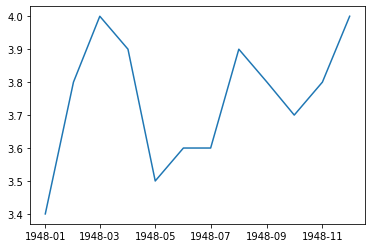

In [26]:
# Assign the first 12 rows to a variable 
first_twelve = unrate[0:12]

# Generate a line chart that visualizes the unemployment rates from 1948
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])

# Display the plot
plt.show()

## 8. Fixing Axis Ticks

While the y-axis looks fine, the x-axis **tick labels** are too close together and are unreadable. The line charts from earlier in the mission suggest a better way to display the x-axis tick labels:
![alt text](https://s3.amazonaws.com/dq-content/unemp_line_plot.png)

We can rotate the x-axis tick labels by 90 degrees so they don't overlap. The `xticks()` function within pyplot lets you customize the behavior of the x-axis ticks. If you head over to the [documentation for that function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks), it's not immediately obvious the arguments it takes:

```
matplotlib.pyplot.xticks(*args, **kwargs)
```

In the documentation for the function, you'll see a link to the matplotlib [Text class](http://matplotlib.org/api/text_api.html#matplotlib.text.Text), which is what pyplot uses to represent the x-axis tick labels. You'll notice that there's a `rotation` parameter that accepts degrees of rotation as a parameter. We can specify degrees of rotation using a float or integer value.

As a side note, if you read the [documentation for pyplot](http://matplotlib.org/api/pyplot_api.html), you'll notice that many functions for tweaking the x-axis have matching functions for the y-axis. For example, the y-axis counterpart to the `xticks()` [function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks) is the `yticks()` function.

Use what we've discussed so far to rotate the x-axis tick labels by 90 degrees.

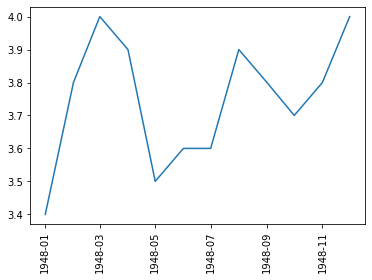

In [27]:
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation = 90)
plt.show()

## 9. Adding Axis Labels And A Title

Let's now finish tweaking this plot by adding axis labels and a title. Always adding axis labels and a title to your plot is a good habit to have, and is especially useful when we're trying to keep track of multiple plots down the road.

Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:

- [xlabel()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlabel): accepts a string value, which gets set as the x-axis label.
- [ylabel()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel): accepts a string value, which is set as the y-axis label.
- [title()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title): accepts a string value, which is set as the plot title.


Instructions:

- Generate the same line chart from the last screen that visualizes the unemployment rates from 1948:
  - x-values should be the first 12 values in the `DATE` column
  - y-values should be the first 12 values in the `VALUE` column
  - Rotate the x-axis tick labels by `90` degrees.
- Set the x-axis label to `Month`.
- Set the y-axis label to `Unemployment Rate`.
- Set the plot title to `Monthly Unemployment Trends, 1948`.
- Display the plot.

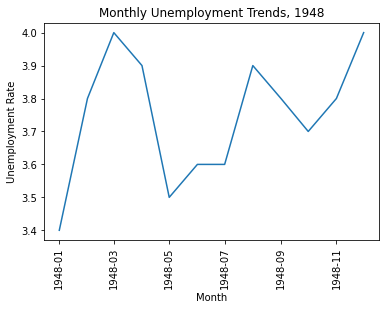

In [35]:
first_twelve = unrate[:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation = 90)

# Set the x-axis label to "Month"
plt.xlabel('Month')

# Set the y-axis label to "Unemployment Rate"
plt.ylabel('Unemployment Rate')

# Set the plot title to "Monthly Unemployment Trends, 1948"
plt.title('Monthly Unemployment Trends, 1948')

plt.show()

In the next mission, we'll dive deeper into matplotlib and learn how to create multiple plots to compare unemployment trends across multiple years.